# Python for Data Analysis II




**Agenda:**

    * matplotlib
    * seaborn
    * numpy
    * scipy

# Basic plotting

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [91]:
df = pd.read_csv('Churn-Modelling.csv')

In [96]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x7f569c1a6da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f569d0343c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f569c10d2e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f569c59a400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f569c1a6ef0>,
  <matplotlib.lines.Line2D at 0x7f569d034b00>]}

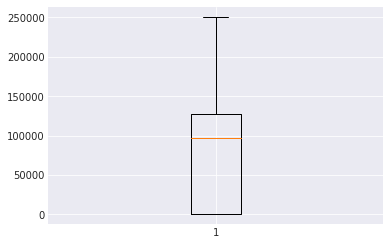

In [98]:
plt.boxplot(df.Balance)

### Plot

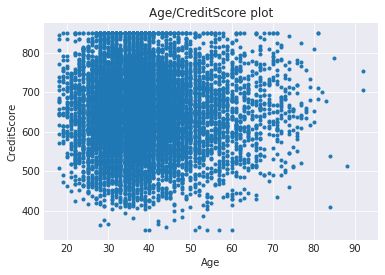

In [99]:
plt.plot(df.Age, df.CreditScore, '.')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Age/CreditScore plot')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([8.25675676e-03, 2.94459459e-02, 4.90405405e-02, 2.52837838e-02,
        1.11891892e-02, 7.06756757e-03, 2.81081081e-03, 1.71621622e-03,
        2.70270270e-04, 5.40540541e-05]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

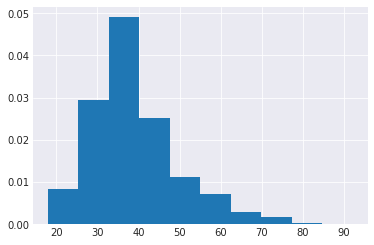

In [100]:
plt.hist(df.Age.values, normed=True)

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

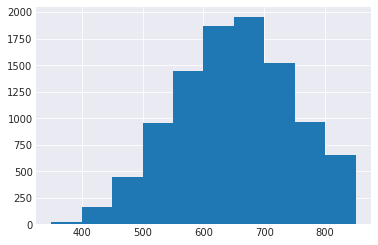

In [101]:
plt.hist(df.CreditScore.values)

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


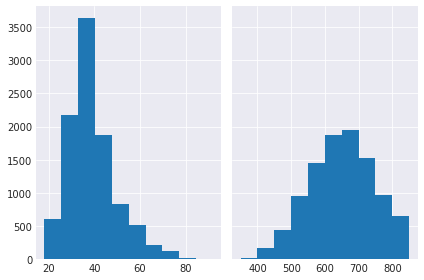

In [102]:
_, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(df.Age.values, bins=10)
axs[1].hist(df.CreditScore.values, bins=10)

### Bar plot

<BarContainer object of 2 artists>

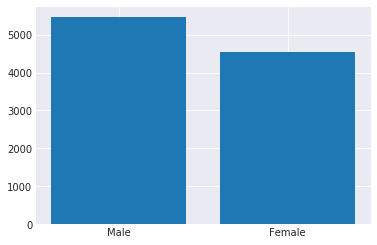

In [103]:
plt.bar(df.Gender.value_counts().keys(), df.Gender.value_counts().values)

### Horizontal bar plot

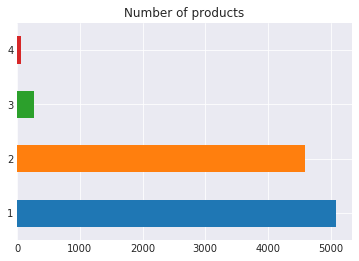

In [104]:
df.NumOfProducts.value_counts().plot(kind='barh',title="Number of products");

### Pie chart

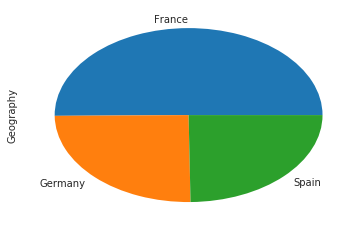

In [105]:
df.Geography.value_counts().plot(kind='pie');

We can plot more interesting plots, with matplotlib already embedded into pandas functions. For example:

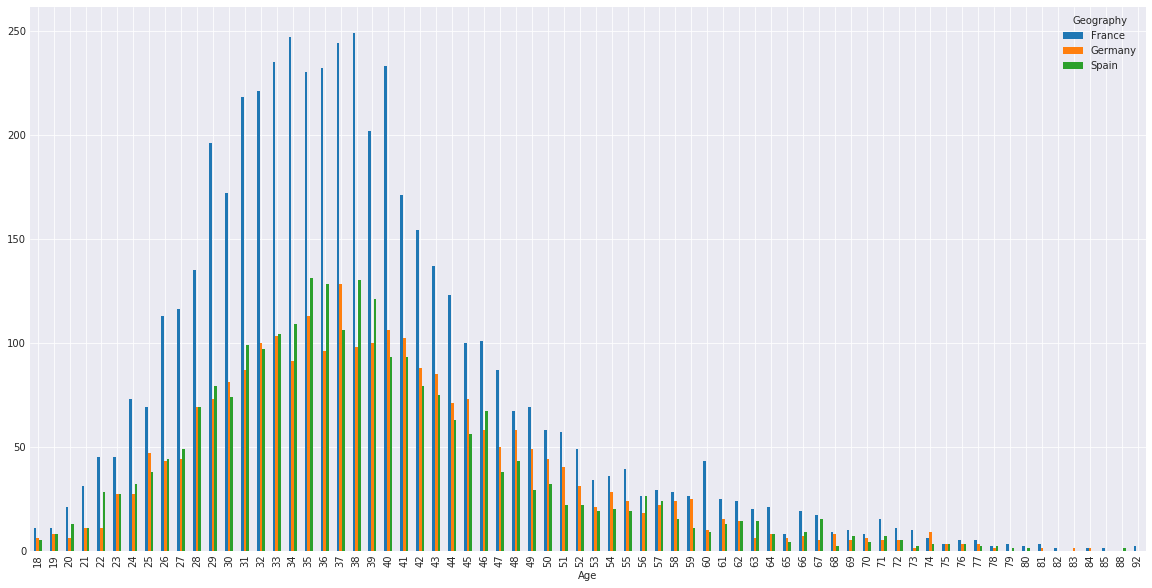

In [106]:
df.groupby(['Age', 'Geography']).size().unstack('Geography').plot(kind='bar', figsize=(20,10))

# Seaborn basic plotting

In [107]:
import seaborn as sns

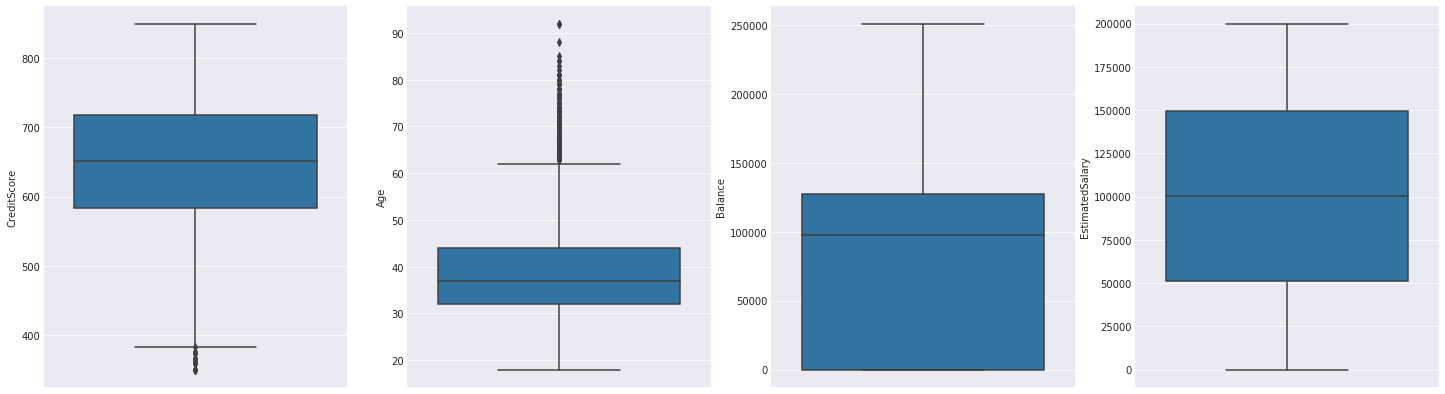

In [108]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.boxplot(data=df, y=col, ax=axes[index])

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


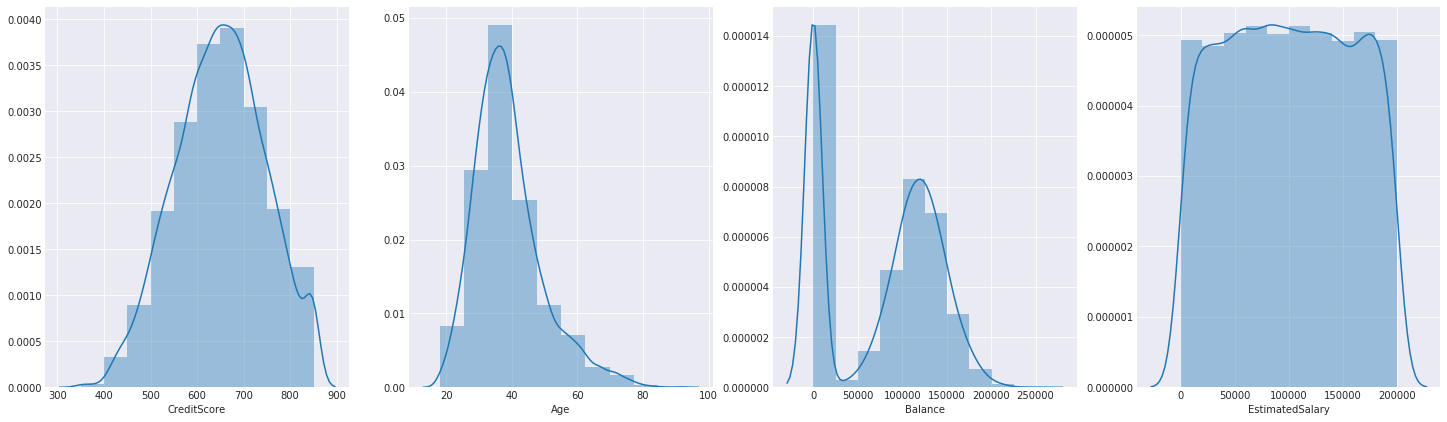

In [176]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.distplot(df[col], bins=10, ax=axes[index])

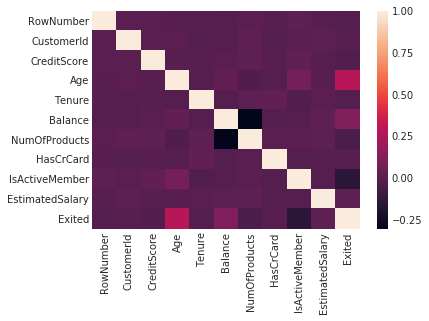

In [109]:
sns.heatmap(df.corr())

# Extra

In [115]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')

In [116]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [167]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [169]:
kill.dropna(inplace=True)

Text(0.5,1,'Manner of death')

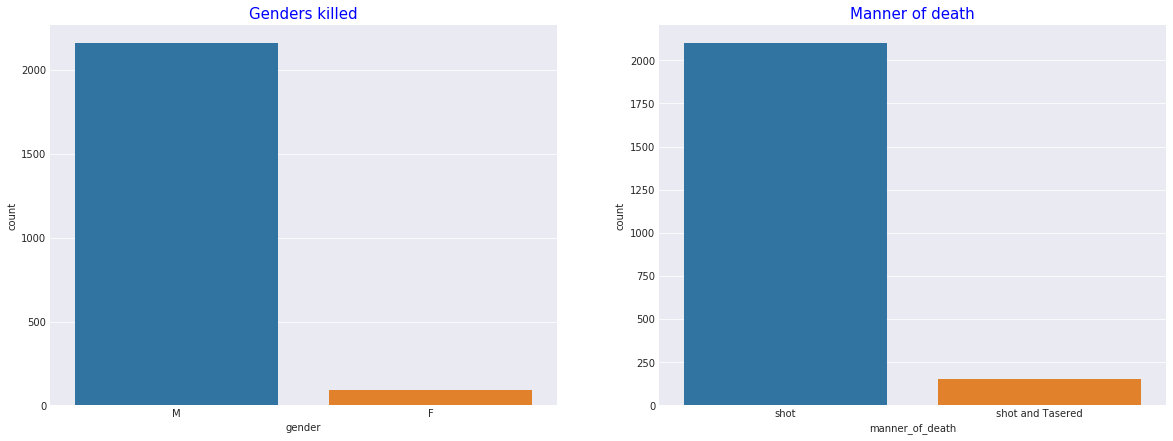

In [170]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.countplot(kill.gender, ax=axes[0])
axes[0].set_title('Genders killed', color='blue', fontsize=15)
sns.countplot(kill.manner_of_death, ax=axes[1])
axes[1].set_title('Manner of death', color='blue', fontsize=15)

Text(0.5,1,'Kill weapon')

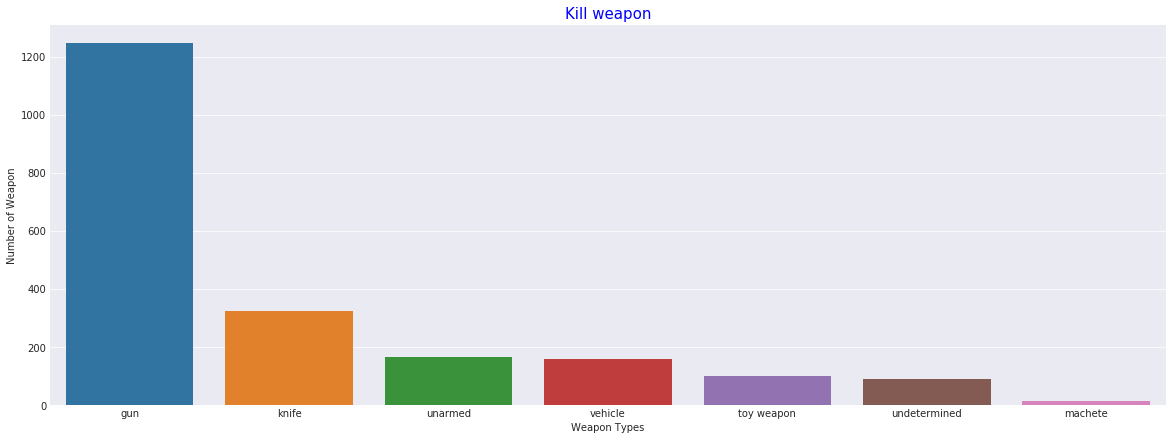

In [188]:
# kill weapon
armed = kill.armed.value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5,1,'Threat types')

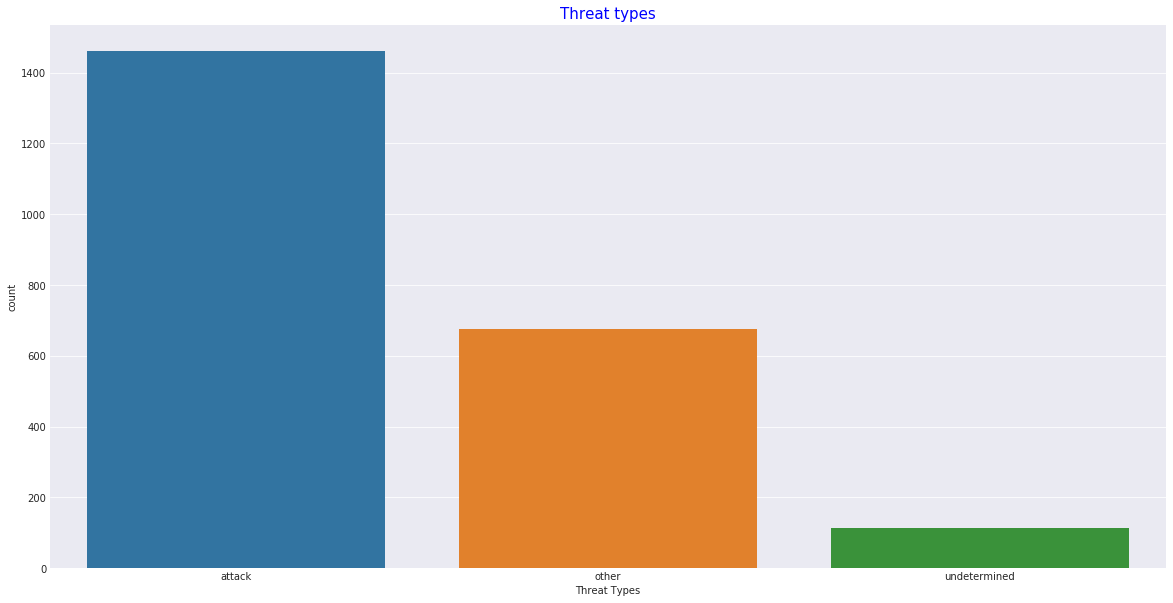

In [187]:
# Threat types
plt.figure(figsize=(20,10))
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Most dangerous cities')

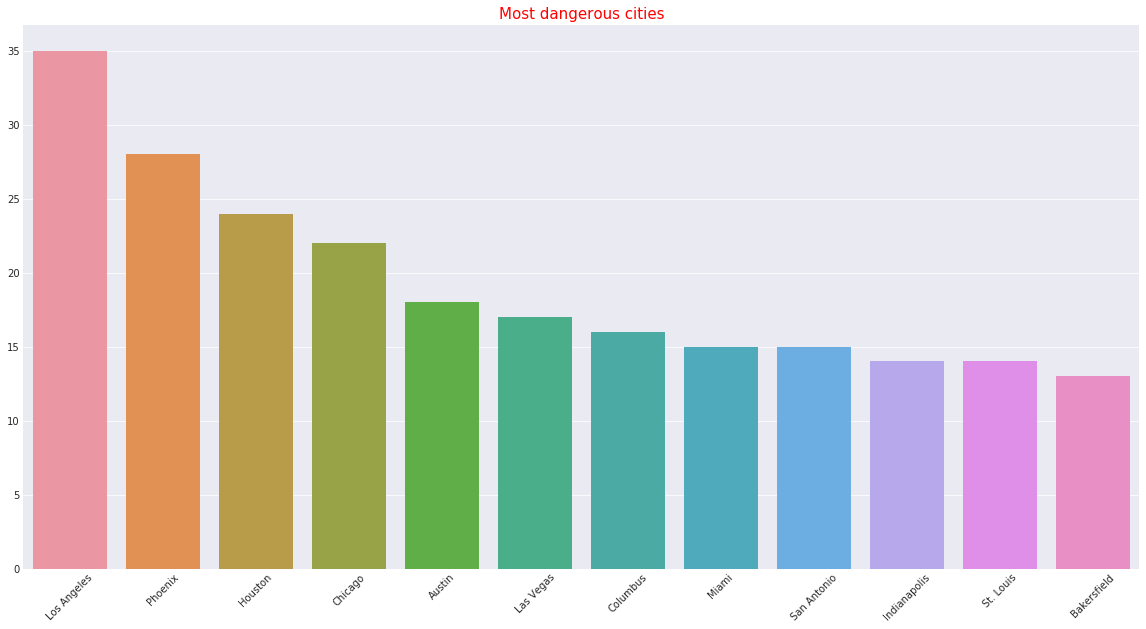

In [180]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color='red',fontsize=15)

Text(0.5,1,'Kill Numbers from States')

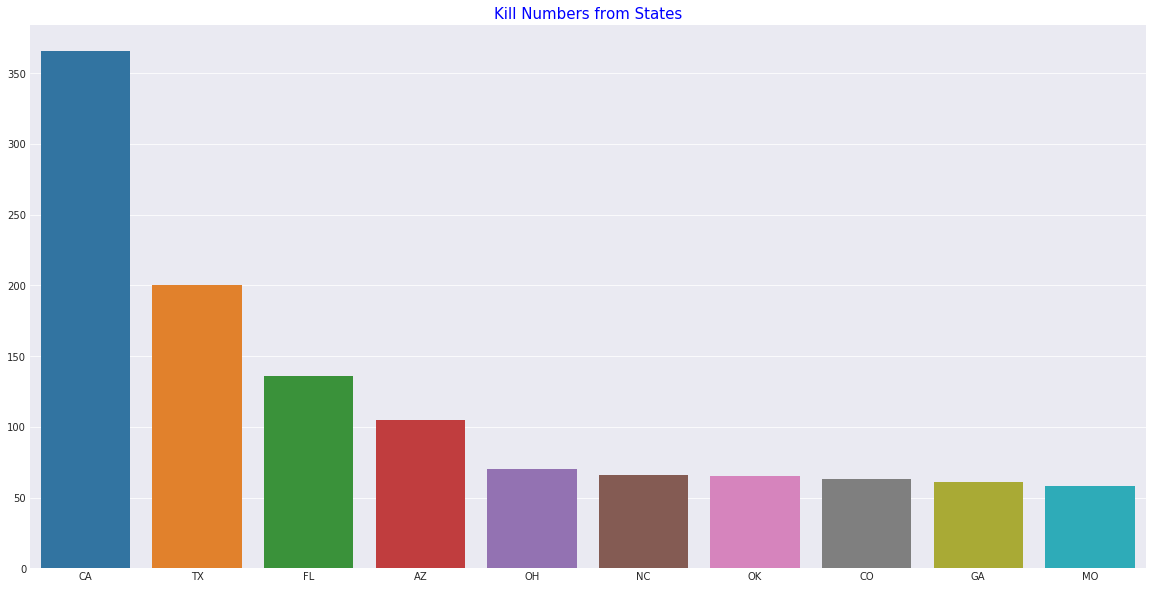

In [229]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# Numpy

Install numpy https://www.scipy.org/install.html

In [193]:
import numpy as np

In [194]:
np.__version__

'1.14.2'

## Arrays

The central feature of NumPy is the array object class. Arrays are similar to lists in Python,
except that every element of an array must be of the same type, typically a numeric type like
float or int. Arrays make operations with large amounts of numeric data very fast and are
generally much more efficient than lists.

In [195]:
a = np.array([1, 4, 5, 8], float)

In [196]:
type(a)

numpy.ndarray

In [197]:
a

array([1., 4., 5., 8.])

Here, the function array takes two arguments: the list to be converted into the array and the
type of each member of the list. Array elements are accessed, sliced, and manipulated just like
lists:

In [198]:
a[:2]

array([1., 4.])

In [199]:
a[3]

8.0

In [200]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [201]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [202]:
a[0,0]

1.0

In [203]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a[1,:]

array([4., 5., 6.])

In [204]:
a[:,2]

array([3., 6.])

In [205]:
a.shape

(2, 3)

In [206]:
a = np.array(range(6), float).reshape((2, 3))

In [207]:
a

array([[0., 1., 2.],
       [3., 4., 5.]])

In [208]:
a.transpose()

array([[0., 3.],
       [1., 4.],
       [2., 5.]])

In [209]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Other ways to create arrays

In [210]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [211]:
np.ones((2,3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [212]:
np.zeros(7, dtype=int)

array([0, 0, 0, 0, 0, 0, 0])

## Array mathematics

In [213]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
a + b

array([6., 4., 9.])

In [214]:
a - b

array([-4.,  0., -3.])

In [215]:
a * b

array([ 5.,  4., 18.])

In [216]:
b / a

array([5., 1., 2.])

In [217]:
a % b

array([1., 0., 3.])

In [218]:
b**a

array([  5.,   4., 216.])

In [219]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)
a + b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In addition to the standard operators, NumPy offers a large library of common mathematical
functions that can be applied elementwise to arrays. Among these are the functions: abs,
sign, sqrt, log, log10, exp, sin, cos, tan, arcsin, arccos,
arctan, sinh, cosh, tanh, arcsinh, arccosh, and arctanh

## Basic array operations

In [220]:
a = np.array([2, 4, 3], float)
a.sum()

9.0

In [221]:
a.mean()

3.0

In [222]:
a.std()

0.816496580927726

In [223]:
a.min()

2.0

In [224]:
a.max()

4.0

In [225]:
a.var()

0.6666666666666666

## Array item selection and manipulation

In [226]:
a = np.array([[6, 4], [5, 9]], float)

In [227]:
a[a >= 6]

array([6., 9.])

In [228]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)
a.take(b)

array([2., 2., 4., 8., 6., 4.])

More: http://docs.scipy.org/doc/

# Scipy

In [231]:
import scipy

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.